In [ ]:
#### Controversia en Youtube.
#### Cyn, Caro

## Definición de CONTROVERSIAL:
## Definición de EXITO:
## Definición de TRENDING:
## Data obtenida de Kaggle, base de datos de 40949 videos Trending 
## En USA, de Noviembre 2017 a Junio 2018. 
## Informacion proporcionada por la Data:
#        ['id', 'trending_date', 'title', 'channel_title', 'category_id',
#        'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
#        'thumbnail_link', 'comments_disabled', 'ratings_disabled',
#        'video_error_or_removed', 'description']

## Hipotesis: videos controversiales general gran cantidad de views.

In [ ]:
# * Title Slide

#   * Include the name of the Project and Group Members

# * Motivation & Summary Slide

#   * Define the core message or hypothesis of your project.
#   * Describe the questions you asked, and _why_ you asked them
#   * Describe whether you were able to answer these questions to your satisfaction, and briefly summarize your findings

# * Questions & Data

#   * Elaborate on the questions you asked, describing what kinds of data you needed to answer them, and where you found it

# * Data Cleanup & Exploration

#   * Describe the exploration and cleanup process
#   * Discuss insights you had while exploring the data that you didn't anticipate
#   * Discuss any problems that arose after exploring the data, and how you resolved them
#   * Present and discuss interesting figures developed during exploration, ideally with the help of Jupyter Notebook

# * Data Analysis

#   * Discuss the steps you took to analyze the data and answer each question you asked in your proposal
#   * Present and discuss interesting figures developed during analysis, ideally with the help of Jupyter Notebook

# * Discussion

#   * Discuss your findings. Did you find what you expected to find? If not, why not? What inferences or general conclusions can you draw from your analysis?

# * Post Mortem

#   * Discuss any difficulties that arose, and how you dealt with them
#   * Discuss any additional questions that came up, but which you didn't have time to answer: What would you research next, if you had two more weeks?

In [109]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json 
import sys
import os 




In [110]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"
original_df = pd.read_csv(us_csv)
original_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [111]:
# Rename column name 
df= original_df.rename(columns={"video_id": "id"})

#                                        "trending_date": "Trending Date",
#                                        "title": "Title",
#                                        "channel_title": "Channel",
#                                        "category_id": "Category",
#                                        "publish_time": "Publish Date",
#                                        "tags": "Tags",
#                                        "views": "Views",
#                                        "likes": "Likes",
#                                        "dislikes": "Dislikes",
#                                        "comment_count": "Comments"})

df.columns

Index(['id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## 1 . Cleaning Data 

In [112]:
# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']
del df['thumbnail_link']
del df['description']


In [113]:
df.head()

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [114]:
# Count how many videos are in the data Frame:
print("Total number of videos in the DataFrame, ordered by more trending days:")
df["id"].value_counts()

# Notar que el video j4KvrAUjn6c  estuvo trending durante  30

Total number of videos in the DataFrame, ordered by more trending days:


j4KvrAUjn6c    30
8h--kFui1JA    29
MAjY8mCTXWk    29
r-3iathMo7o    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
QBL8IRJ5yHU    29
NBSAQenU2Bk    29
YI3tsmFsrOg    28
mdWcaWBxxcY    28
WIV3xNz8NoM    28
6S9c5nnDd_s    28
vjSohj-Iclc    28
2PH7dK6SLC8    28
UfKmSfgFxi8    28
ulNswX3If6U    28
0zZ0Y_UZRBw    27
BspHjvU11y4    27
Xpv-sEKl1B4    27
-kTWIm7m4Uw    27
6SuMbFuKDf8    27
H7gh2fmdjCU    27
TjXQzRWmb_I    27
pFc6I0rgmgY    27
nRc0kmOYgzQ    27
1purAy2MsOc    27
um-1fAVU1OQ    27
ju_inUnrLc4    26
D6Oy4LfoqsU    26
ooyjaVdt-jA    26
               ..
MCW5HUkrr-o     1
BOQ-wZQhZZo     1
SYVSeH6sYYU     1
jQF5Q3773uk     1
zeQaJGkFyqQ     1
DOIw62TXYkg     1
zq0T7ye-Pn4     1
PitmObjGur4     1
CO9dIyNM_9Q     1
zYWt2mnalP8     1
qPEIPu0V8GQ     1
8szK9FBpdPI     1
wnwF1FHybDQ     1
yI7qQ85DTZY     1
AmZJwThOfzE     1
hX643KbiI4s     1
HOblx_0Zyts     1
egXr0PU-kCY     1
lRXHd3HNzEo     1
sLFaa6RPJIU     1
feDs1pIhTFQ     1
-QPdRfqTnt4     1
xfi2eRAokc8     1
8sAApdJdG3A     1
sfj3aX_ed7

In [115]:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]
print("Total trending days of each video:")
video_trending_count.sort_values(ascending=False).head()

Total trending days of each video:


id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
Name: title, dtype: int64

### 2. Categorias con mayor cantidad de Videos Trending

In [116]:
## Cual es la categoria que tiene mas videos trending?

# Creating a DataFrame of top 100 videos with more days as "trending" (video_count)

video_frequence_df = df.groupby(['id', 'category_id'])['id'].agg(
                {"video_frequence": len
                }).sort_values("video_frequence", ascending=False).reset_index()

video_frequence_df.head()


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,id,category_id,video_frequence
0,j4KvrAUjn6c,24,30
1,MAjY8mCTXWk,10,29
2,r-3iathMo7o,28,29
3,NBSAQenU2Bk,1,29
4,8h--kFui1JA,10,29


In [117]:
# Category frequence on trending videos:
category_frequence = video_frequence_df.groupby("category_id").id.nunique()
category_frequence.sort_values(ascending=False)
category_frequence_df = pd.DataFrame(category_frequence) 
category_frequence_df= category_frequence_df.rename(columns={'id': "category_frequence"})
category_frequence_df.sort_values('category_frequence',ascending=False).head(100)

,category_frequence
category_id,
24,1622
10,801
26,595
23,547
25,507
22,498
17,452
28,381
1,321


In [118]:
## Notar que de un total de 40949 videos evaluados estos son los porcentajes respecto a las categorias:

category_percentage= (category_frequence_df["category_frequence"]/len(df["id"].value_counts()))*100
category_percentage

# notar que el 25% de videos trending durante Nov17 - Jun son de la Categoria 24 Entertainment. siendo el mas famoso "j4KvrAUjn6c"

category_id
1      5.054322
2      1.117934
10    12.612187
15     2.220123
17     7.116989
19     0.944733
20     1.621792
22     7.841285
23     8.612817
24    25.539285
25     7.982995
26     9.368603
27     3.952134
28     5.999055
29     0.220438
43     0.062982
Name: category_frequence, dtype: float64

In [119]:
# Read the Json File with categories names and Id so we can show names in the plot

filepath = os.path.join("Resources/US_category_id.json")
with open(filepath) as jsonfile:
    categories_data = json.load(jsonfile)
# See the json 
#categories_data

In [120]:
# Add a new column to transform category id into names 
category_frequence_df["category_name"] = ""
#category_frequence_df.sort_values("category_frequence",ascending=False)
category_frequence_df = category_frequence_df.reset_index()
category_frequence_df.head()

,category_id,category_frequence,category_name
0,1,321,
1,2,71,
2,10,801,
3,15,141,
4,17,452,


In [121]:
def video_category_name(dF): 
    for index,row in category_frequence_df.iterrows():
        x = row['category_id']
        #x = category_frequence_df.loc[index,'category_count']
        if category_frequence_df.loc[index,'category_id'] == x: 
            try:
                category_frequence_df.loc[index,"category_name"] = categories_data["items"][x-1]["snippet"]["title"] 
            except:
                pass
video_category_name(category_frequence_df)
category_frequence_df.sort_values("category_frequence",ascending=False)

,category_id,category_frequence,category_name
9,24,1622,Drama
2,10,801,People & Blogs
11,26,595,Foreign
8,23,547,Documentary
10,25,507,Family
7,22,498,Comedy
4,17,452,Nonprofits & Activism
13,28,381,Sci-Fi/Fantasy
0,1,321,Film & Animation
12,27,251,Horror


In [122]:
####### falta solamente que traiga el canal 13.
######### REVISAR QUE ESTE TRAYENDO EL NOMBRE CORRESPONDIENTE, EJEM: 10 ES MUSIC


In [123]:
## Categoria con mas videos trending "Music"  "Entertaiment"

Text(0, 0.5, 'Qty of Trending Videos')

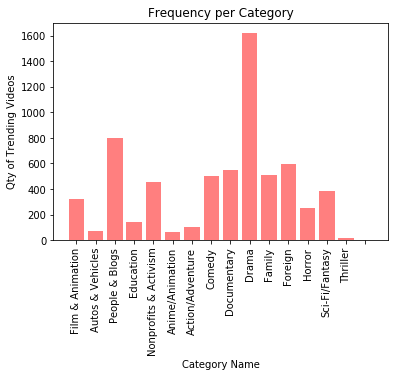

In [124]:
#category_frequence_df.plot(category_name, category_frequence, kind="bar", figsize=(20,3))
plt.bar(category_frequence_df['category_name'], category_frequence_df['category_frequence'], facecolor="red", alpha=0.50, align="center")
plt.xticks(rotation=90)
plt.title("Frequency per Category")
plt.xlabel("Category Name")
plt.ylabel("Qty of Trending Videos")

### 3. Canales con mayor cantidad de Videos Trending


In [125]:
# crear lista de los 20 primeros canales unicos de los videos que estuvieron mas dias trending

trending_videos_per_channel= pd.DataFrame(df.groupby("channel_title").id.nunique().sort_values(ascending=False))
trending_videos_per_channel=trending_videos_per_channel[:20]
trending_videos_per_channel.reset_index(inplace=True)
trending_videos_per_channel


## Notar que video con mas dias trending, es de categoria entretenimiento y su canal en el rango de tiempo solamnete tuvo dos videos trending.
## mientras que el canal con mas videos trending en el total de tiempo es ESPN con 84 videos trending en el mismo tiempo.



,channel_title,id
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,The Late Show with Stephen Colbert,58
5,Netflix,58
6,NBA,55
7,CNN,52
8,Vox,47
9,The Late Late Show with James Corden,46


In [126]:
###### Plot of the 20 channels with more trending videos.

# trending_videos_per_channel["id"].sum()
# 84/958 

In [127]:
# set x, y axis and tick locations:

x_axis= trending_videos_per_channel["channel_title"]
y_axis= trending_videos_per_channel["id"]
tick_locations = [value for value in x_axis]

(0, 94)

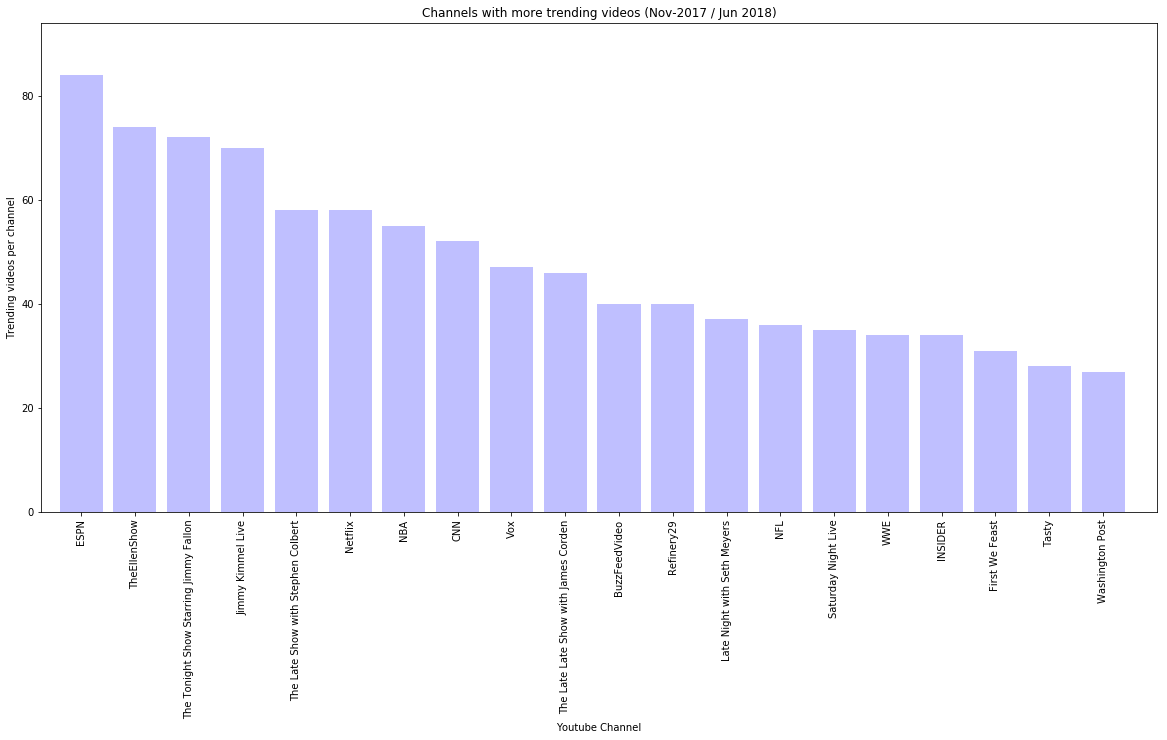

In [128]:
plt.figure(figsize=(20,9))
# Create a bar chart based upon the above data
top_channel_plot= plt.bar(x_axis, y_axis, color="b", alpha=0.25, align="center") 
plt.xticks(tick_locations,trending_videos_per_channel["channel_title"], rotation="vertical")
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)

# Set a Title and labels
plt.title("Channels with more trending videos (Nov-2017 / Jun 2018)")
plt.xlabel("Youtube Channel")
plt.ylabel("Trending videos per channel")

# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)



In [129]:
## video con mas views:

video_by_id = df.set_index("id").groupby(["id"])

top100videos_views = video_by_id.max()["views"]

top100videos_views_df = pd.DataFrame(top100videos_views)

top100videos_views_df = top100videos_views_df.groupby(['id']).head()
topvideos_views_df = top100videos_views_df.groupby(['id']).head()
top100videos_views_df.sort_values("views",ascending=False)


,views
id,
VYOjWnS4cMY,225211923
FlsCjmMhFmw,149376127
ffxKSjUwKdU,148689896
zEf423kYfqk,139334502
7C2z4GqqS5E,123010920
M4ZoCHID9GI,122544931
TyHvyGVs42U,102012605
xTlNMmZKwpA,94254507
6ZfuNTqbHE8,91933007


In [130]:
## Resumen 1:

# video mas tiempo trending:"j4KvrAUjn6c" 30 dias trending 10,381,263 views, representa el 4.6% de views respecto al video que mas views tiene.
# likes: 163,325 dislikes:20,892 comments:25,323

# video con mas views :"VYOjWnS4cMY" 25 dias trending 225,211,923 views,
#likes: 5,023,450 dislikes:343,541 comments:517,232

# canal con mas videos trending: ESPN con 85 videos que representan el %8 de los videos trending
# categoria con mas videos trending: categoria 24, representa el 25% de los videos trending.




In [131]:
# Relacion Likes and interactions

relation_likes = df["likes"]/ (df["likes"]+df["dislikes"])

# Relacion dislikes and interactions

relation_dislikes = df["dislikes"]/ (df["likes"]+df["dislikes"])

# Nivel de aprobacion
approve_level = df["likes"]/ (df["views"])

# Nivel de rechazo

rejection_level = df["dislikes"]/ (df["views"])

# Relacion comentarios y views

comment_level = df["comment_count"]/ (df["views"])

# indicador de reaccion basado en likes y dislikes. 

reaction_indicator = (df["likes"] + df["dislikes"])/ df["views"]


# una persona puede ver varias veces el video y una sola vez marcar like o dislike, 
# ademas una persona puede agregar el numero de comentarios que desee.
# dado que no tenemos forma de saber cuantas veces una persona vio un video o si dio like y comentario, o numero de comentario
# un indicador global de reaccion es:

reaction_global_indicator = (df["likes"] + df["dislikes"]+ df["comment_count"])/ df["views"]


# agregar indicadores a la data frame

df["relation_likes"] = relation_likes
df["relation_dislikes"] = relation_dislikes
df["approve_level"] = approve_level
df["rejection_level"] = rejection_level
df["comment_level"] = comment_level
df["reaction_indicator"] = reaction_indicator
df["reaction_global_indicator"] = reaction_global_indicator


In [132]:
#relation_likes_by_id = df["likes"]/ (df["likes"]+df["dislikes"])
#df["relation_likes"] = relation_likes

relation_likes_by_id = df.set_index("id").groupby(["id"]).max()["relation_likes"]

relation_dislikes_by_id = df.set_index("id").groupby(["id"]).max()["relation_dislikes"]

approve_level_by_id = df.set_index("id").groupby(["id"]).max()["approve_level"]

rejection_level_by_id = df.set_index("id").groupby(["id"]).max()["rejection_level"]

comment_level_by_id = df.set_index("id").groupby(["id"]).max()["comment_level"]

reaction_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_indicator"]

reaction_global_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_global_indicator"]


# agregar indicadores a la data frame

top100videos_views_df["likes_indicator"]=relation_likes_by_id
top100videos_views_df["dislikes_indicator"] = relation_dislikes_by_id
top100videos_views_df["approve_indicator"] = approve_level_by_id
top100videos_views_df["rejection_indicator"] = rejection_level_by_id
top100videos_views_df["comment_indicator"] = comment_level_by_id
top100videos_views_df["reaction_indicator"] = reaction_indicator_by_id
top100videos_views_df["reaction_global_indicator"] = reaction_global_indicator_by_id

#### agregar channel_title   y   category_id
top100videos_views_df.reset_index(inplace=True)
top100videos_views_df.head(10)

,id,views,likes_indicator,dislikes_indicator,approve_indicator,rejection_indicator,comment_indicator,reaction_indicator,reaction_global_indicator
0,-0CMnp02rNY,800359,0.974340,0.032855,0.013722,0.000416,0.000585,0.014083,0.014652
1,-0NYY8cqdiQ,563746,0.987954,0.012046,0.007856,0.000096,0.000167,0.007952,0.008119
2,-1Hm41N0dUs,2058516,0.988143,0.013866,0.020904,0.000282,0.000951,0.021154,0.022105
3,-1yT-K3c6YI,231341,0.979707,0.027442,0.040306,0.000958,0.003989,0.041141,0.045130
4,-2RVw2_QyxQ,71089,0.950108,0.055441,0.006496,0.000380,0.000341,0.006864,0.007178
5,-2aVkGcI7ZA,2390558,0.968306,0.038492,0.019100,0.000687,0.000514,0.019725,0.020238
6,-2b4qSoMnKE,291653,0.878880,0.137326,0.017040,0.002348,0.018998,0.019388,0.038386
7,-2wRFv-mScQ,1036300,0.975495,0.029284,0.014715,0.000386,0.000806,0.015085,0.015891
8,-35jibKqbEo,2425578,0.990203,0.011627,0.134664,0.001332,0.011284,0.135996,0.147280
9,-37nIo_tLnk,3170,1.000000,0.000000,0.001262,0.000000,0.000315,0.001262,0.001577


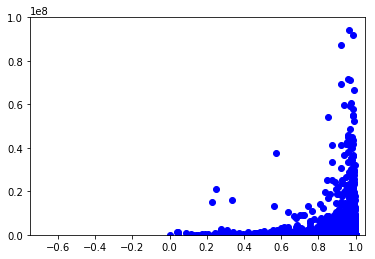

In [154]:
plt.scatter(top100videos_views_df["likes_indicator"], top100videos_views_df["views"], marker="o", facecolors="blue")
plt.ylim(-0.75,100000000)
plt.xlim(-0.75,1.05)
plt.show()

         

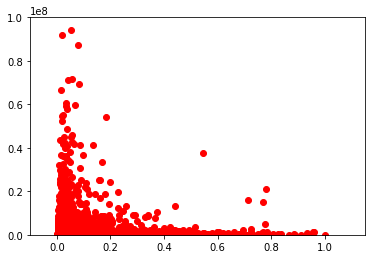

In [146]:
plt.scatter(top100videos_views_df["dislikes_indicator"], top100videos_views_df["views"], marker="o", facecolors="red")
plt.ylim(-0.75,100000000)
plt.xlim(-0.1,1.15)
plt.show()


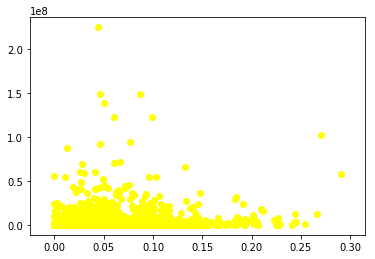

In [22]:
plt.scatter(top100videos_views_df["approve_indicator"], top100videos_views_df["views"], marker="o", facecolors="yellow")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

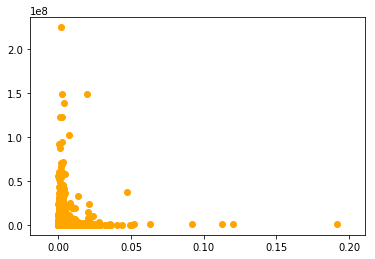

In [23]:

plt.scatter(top100videos_views_df["rejection_indicator"], top100videos_views_df["views"], marker="o", facecolors="orange")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

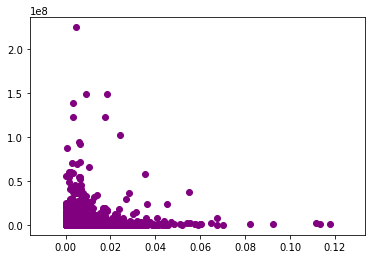

In [24]:

plt.scatter(top100videos_views_df["comment_indicator"], top100videos_views_df["views"], marker="o", facecolors="purple")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()




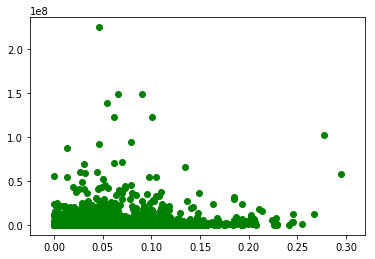

In [25]:
plt.scatter(top100videos_views_df["reaction_indicator"], top100videos_views_df["views"], marker="o", facecolors="green")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

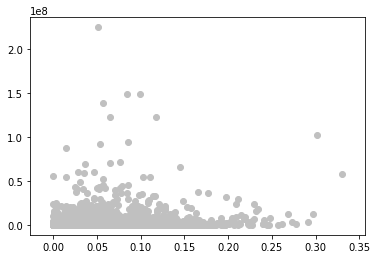

In [26]:
plt.scatter(top100videos_views_df["reaction_global_indicator"], top100videos_views_df["views"], marker="o", facecolors="silver")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

In [27]:
# Inventemos un poco <----- borrar pensamientos.

# -	HIPOTESIS: lo controversial de un video es proporsional a su exito(independientemente de de su categoria) 
# ANALISIS: indicador de controversialidad comment/views; dislikes/views; dislikes/(likes+dislikes); 
# (considerer multiplicar todos los anteriores como indicador global) VS indicador de exito viewstotal; #dias en trending.


